In [37]:
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [38]:
def display_image(img_set,title_st):
    n=len(title_st)
    for i in range(n):
        plt.subplot(3,3,i+1)
        plt.imshow(img_set[i],cmap='gray')
        plt.title(title_st[i])
    plt.show()
    plt.close()

trainX.shape: (50000, 32, 32, 3), trainY.shape: (50000, 1), testX.shape: (10000, 32, 32, 3), testY.shape: (10000, 1))
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


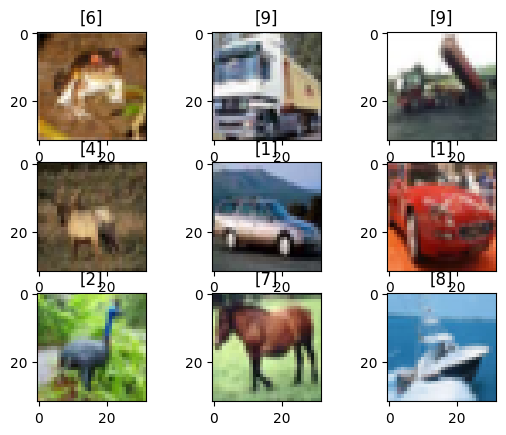

In [39]:
(trainX, trainY), (testX, testY) = load_data()
# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Dispaly some loaded image data
display_image(trainX[:9], trainY[:9])

In [40]:
# trainX = np.expand_dims(trainX, axis=-1)
# testX = np.expand_dims(testX, axis=-1)

trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)


# Investigate updated x
print('trainX.shape: {}, testX.shape: {})'.format(trainX.shape, testX.shape))
print('trainX.dtype: {}, testX.dtype: {}'.format(trainX.dtype, testX.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Investigate updated y
print('trainY.shape: {}, testY.shape: {})'.format(trainY.shape, testY.shape))
print('trainY.dtype: {}, testX.dtype: {}'.format(trainY.dtype, testY.dtype))
print(trainY[:5])

trainX.shape: (50000, 32, 32, 3), testX.shape: (10000, 32, 32, 3))
trainX.dtype: uint8, testX.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0
trainY.shape: (50000, 10), testY.shape: (10000, 10))
trainY.dtype: float64, testX.dtype: float64
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [41]:
mobilenet_model = mobilenet.MobileNet(input_shape=(32,32,3), weights='imagenet', include_top=False)
# mobilenet_model.summary()

inputs = mobilenet_model.inputs
x = mobilenet_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)
model.summary()

/tmp/ipykernel_26544/1883806018.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = mobilenet.MobileNet(input_shape=(32,32,3), weights='imagenet', include_top=False)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 16, 16, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 8, 8, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 8, 8, 128)      │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,534,826 (13.48 MB)

 Trainable params: 3,512,938 (13.40 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [42]:
for layer in model.layers[:-5]:
    layer.trainable = False
model.summary(show_trainable=True)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_6 (InputLayer)  │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1 (Conv2D)              │ (None, 16, 16, 32)    │        864 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_bn                    │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_relu (ReLU)           │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1 (DepthwiseConv2D) │ (None, 16, 16, 32)    │        288 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_bn                │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_relu (ReLU)       │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1 (Conv2D)          │ (None, 16, 16, 64)    │      2,048 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_bn                │ (None, 16, 16, 64)    │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_relu (ReLU)       │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pad_2 (ZeroPadding2D)  │ (None, 17, 17, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2 (DepthwiseConv2D) │ (None, 8, 8, 64)      │        576 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_bn                │ (None, 8, 8, 64)      │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_relu (ReLU)       │ (None, 8, 8, 64)      │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2 (Conv2D)          │ (None, 8, 8, 128)     │      8,192 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_bn                │ (None, 8, 8, 128)     │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3 (DepthwiseConv2D) │ (None, 8, 8, 128)     │      1,152 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_bn                │ (None, 8, 8, 128)     │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3 (Conv2D)          │ (None, 8, 8, 128)     │     16,384 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3_bn                │ (None, 8, 8, 128)     │        512 │   N 

 Total params: 3,534,826 (13.48 MB)

 Trainable params: 305,962 (1.17 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [44]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, batch_size=64, validation_split=0.1, epochs=15)

Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.2188 - loss: 2.1132 - val_accuracy: 0.2052 - val_loss: 2.1256
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.2199 - loss: 2.1153 - val_accuracy: 0.2014 - val_loss: 2.1411
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.2179 - loss: 2.1131 - val_accuracy: 0.2132 - val_loss: 2.1317
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.2223 - loss: 2.1077 - val_accuracy: 0.2092 - val_loss: 2.1252
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.2246 - loss: 2.1049 - val_accuracy: 0.2108 - val_loss: 2.1321
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.2225 - loss: 2.1024 - val_accuracy: 0.2062 - val_loss: 2.1337
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.2216 - loss: 2.1059 - val_accuracy: 0.2082 - val_loss: 2.1287
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.2248 - loss: 2.1001 - 

In [45]:
#evaluation
model.evaluate(testX,testY)

#prediction
predictions = model.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictions[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2061 - loss: 2.1636


/home/sanjoy-kumar/Documents/Academic/4.1/LAB/4.1 Lab/AI/Coding Help/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_524']
Received: inputs=Tensor(shape=(32, 32, 32, 3))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
OriginalY   PredictedY
=========   ==========
3 		 8
8 		 9
8 		 1
0 		 8
6 		 6
6 		 6
1 		 4
6 		 6
3 		 3
1 		 6


Fine Tuning

In [49]:
for layer in model.layers[-15:-7]:
    layer.trainable = True
model.summary(show_trainable=True)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_6 (InputLayer)  │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1 (Conv2D)              │ (None, 16, 16, 32)    │        864 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_bn                    │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_relu (ReLU)           │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1 (DepthwiseConv2D) │ (None, 16, 16, 32)    │        288 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_bn                │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_relu (ReLU)       │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1 (Conv2D)          │ (None, 16, 16, 64)    │      2,048 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_bn                │ (None, 16, 16, 64)    │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_relu (ReLU)       │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pad_2 (ZeroPadding2D)  │ (None, 17, 17, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2 (DepthwiseConv2D) │ (None, 8, 8, 64)      │        576 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_bn                │ (None, 8, 8, 64)      │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_relu (ReLU)       │ (None, 8, 8, 64)      │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2 (Conv2D)          │ (None, 8, 8, 128)     │      8,192 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_bn                │ (None, 8, 8, 128)     │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3 (DepthwiseConv2D) │ (None, 8, 8, 128)     │      1,152 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_bn                │ (None, 8, 8, 128)     │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3 (Conv2D)          │ (None, 8, 8, 128)     │     16,384 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3_bn                │ (None, 8, 8, 128)     │        512 │   N 

 Total params: 4,891,414 (18.66 MB)

 Trainable params: 1,894,186 (7.23 MB)

 Non-trainable params: 1,640,640 (6.26 MB)

 Optimizer params: 1,356,588 (5.17 MB)

In [ ]:
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, batch_size=64, validation_split=0.1, epochs=20)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 304s 422ms/step - accuracy: 0.3391 - loss: 2.0027 - val_accuracy: 0.3266 - val_loss: 1.9104
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 298s 423ms/step - accuracy: 0.4160 - loss: 1.6398 - val_accuracy: 0.4078 - val_loss: 1.7457
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 311s 442ms/step - accuracy: 0.4475 - loss: 1.5524 - val_accuracy: 0.2822 - val_loss: 2.8172
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 305s 433ms/step - accuracy: 0.4750 - loss: 1.4958 - val_accuracy: 0.3692 - val_loss: 2.0473
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 328s 465ms/step - accuracy: 0.4927 - loss: 1.4288 - val_accuracy: 0.3954 - val_loss: 1.8303
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 321s 456ms/step - accuracy: 0.5162 - loss: 1.3807 - val_accuracy: 0.3956 - val_loss: 2.1122
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 325s 461ms/step - accuracy: 0.5314 - loss: 1.3389 - val_accuracy: 0.3950 - val_loss: 1.9594
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 298s 424ms/step - accuracy: 0.5508 -

In [ ]:
#evaluation
model.evaluate(testX,testY)

#prediction
predictions = model.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictions[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1555 - loss: 6.4940
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
OriginalY   PredictedY
=========   ==========
3 		 7
8 		 1
8 		 7
0 		 7
6 		 4
6 		 7
1 		 2
6 		 7
3 		 7
1 		 7
